# Iris Flower Classification

### Predict the species of an Iris flower (Setosa, Versicolor, or Virginica) based on the flower's features:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

GOAL: To train a model to classify iris flowers into different species based on these same measurements

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
#Load Data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
sns.pairplot(df, hue='species')

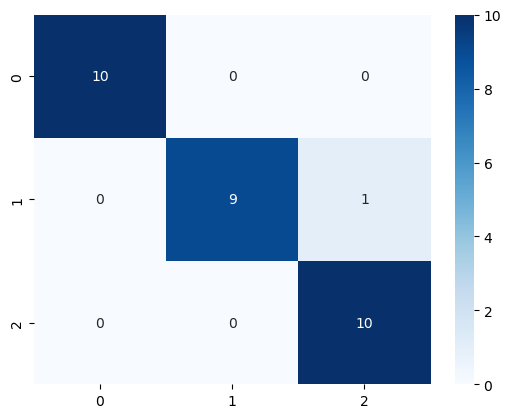

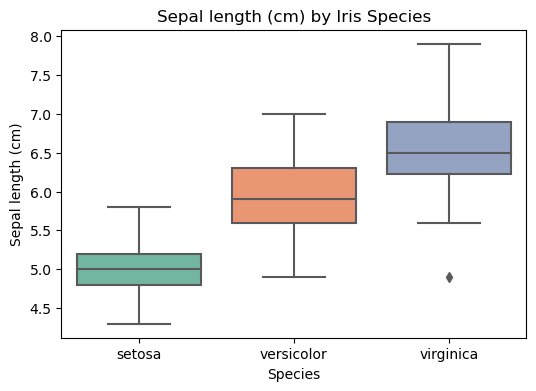

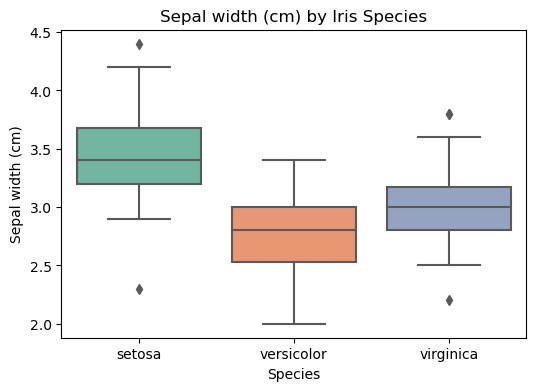

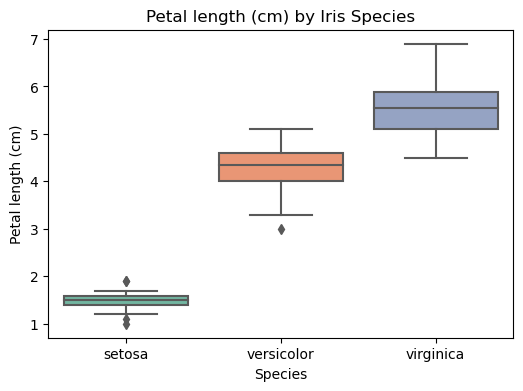

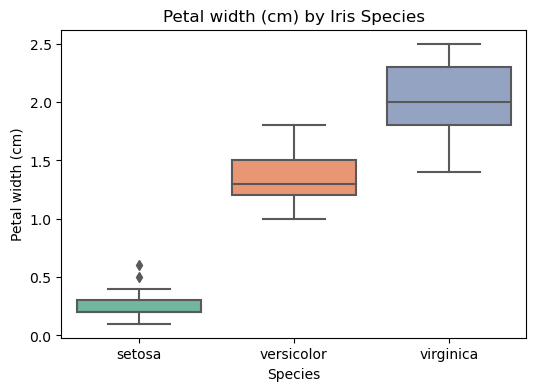

In [29]:
for feature in iris.feature_names:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=feature, data=df, palette="Set2")
    plt.title(f'{feature.capitalize()} by Iris Species')
    plt.xlabel("Species")
    plt.ylabel(feature.capitalize())
    plt.show()

Each plot shows the distribution of one feature (Y-axis) for all species
X-axis is species

In [22]:
#Data Preparation for Models
from sklearn.model_selection import train_test_split
X = df.drop(columns=['species']) #Seperation of Target
y = df['species'] #Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = y, random_state = 42) #80% Training and 20% Testing. Stratify enssures class is consistent in both train and test sets. Random_state to ennsure future users get teh same results

# Logistic Regression Model
is a statistical model that predicts the probability of a binary outcome (either 0 or 1) based on one or more predictor variables


🔍 Accuracy: 0.97

📋 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



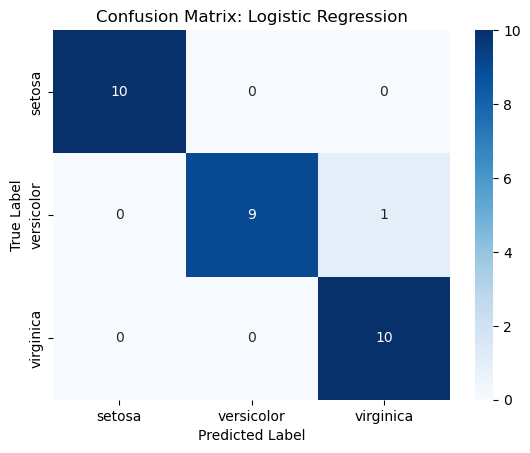

In [42]:
log_reg = LogisticRegression(max_iter=200)  # Increase max_iter to ensure convergence
log_reg.fit(X_train, y_train)#Model creation


y_pred = log_reg.predict(X_test)#Make predictions on test set of the data


accuracy = accuracy_score(y_test, y_pred) #Evaluate performance
print(f"🔍 Accuracy: {accuracy:.2f}\n")

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()# Visualize Confusion Matrix LogReg


# KNN

In [24]:

# Scale features for better distance calculation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [44]:
# Initialize and train KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

C:\Users\inoti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\inoti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


🔍 KNN Accuracy: 0.93

📋 KNN Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



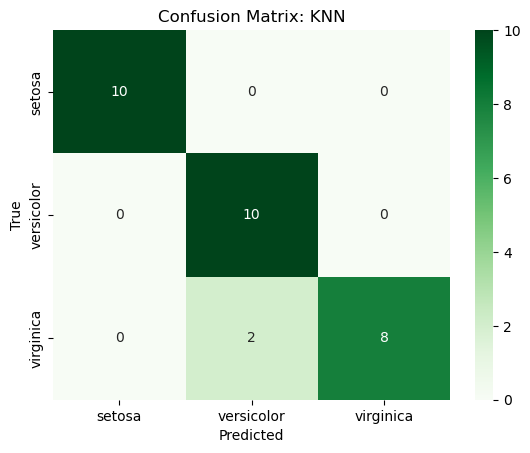

🔍 Accuracy: 0.97

📋 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



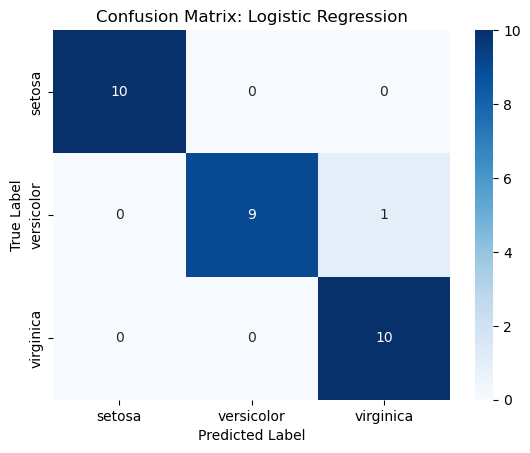

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the Test Dataset
y_pred_knn = knn.predict(X_test_scaled)

# Accuracy and Classification Report
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"🔍 KNN Accuracy: {accuracy_knn:.2f}\n")

print("📋 KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, cmap="Greens", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix: KNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


log_reg = LogisticRegression(max_iter=200)  # Increase max_iter to ensure convergence
log_reg.fit(X_train, y_train)#Model creation


y_pred = log_reg.predict(X_test)#Make predictions on test set of the dataset


accuracy = accuracy_score(y_test, y_pred) #Evaluate performance
print(f"🔍 Accuracy: {accuracy:.2f}\n")

print("📋 Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()# Visualize Confusion Matrix



In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<AxesSubplot:>

C:\Users\inoti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\inoti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Hyperparameter Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 11))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print(f"Best k: {grid.best_params_['n_neighbors']}")


Best k: 5


C:\Users\inoti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\inoti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Gradio App
Sliders and Predictive

In [36]:
import gradio as gr

# Function used to predict species
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    input_scaled = scaler.transform(input_data)  # Scaler just like training
    prediction = knn.predict(input_scaled)[0]
    return f"🌸 Predicted Species: {prediction.capitalize()}"

# Input Sliders for features
inputs = [
    gr.Slider(minimum=4.0, maximum=8.0, step=0.1, label="Sepal Length (cm)"),
    gr.Slider(minimum=2.0, maximum=4.5, step=0.1, label="Sepal Width (cm)"),
    gr.Slider(minimum=1.0, maximum=7.0, step=0.1, label="Petal Length (cm)"),
    gr.Slider(minimum=0.1, maximum=2.5, step=0.1, label="Petal Width (cm)")
]

# Interface
gr.Interface(
    fn=predict_species,
    inputs=inputs,
    outputs="text",
    title="🌼 Iris Flower Classifier (KNN)",
    description="Enter the dimensions of a flower to predict its species."
).launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


C:\Users\inoti\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\inoti\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Key takeaways:
    Types of Iris flowers
    boxplots and pairplots
    random_state=42 used for Reproducibility
    Logistic Regression and K-Nearest Neighbors
    Demo Models
    Model Evaluation
    Gradio
    
    ML workflow:
        Understand Data
        Preprocess and Split(80-20)
        Build Model
        Evaluate Results
        Hyperparameters Tuning
        Deploying...